This notebook explores time series forecasting techniques for a dataset spanning July 2020 to May 2021. Our objective is to predict values for June 2021. We'll compare the performance of four popular approaches:

Linear Regression: A fundamental statistical method for establishing a linear relationship between variables. It's well-suited for capturing linear trends but might struggle with complex patterns.

Recurrent Neural Network (RNN): A type of neural network designed to handle sequential data like time series. RNNs can learn temporal dependencies but can be susceptible to the vanishing gradient problem.


Long Short-Term Memory (LSTM): Another RNN variant explicitly designed to address vanishing gradients. LSTMs employ memory cells to learn long-term dependencies, making them powerful for capturing complex temporal dynam

#THE DATASET


This dataset appears to contain information related to product sourcing and procurement. It consists of several features that describe various aspects of the sourcing process.

1. **ProductType**: This column  represents the type or category of the product being sourced. The values in this column, such as "NTM1" or "NTM2," seem to be product codes or identifiers.

2. **Manufacturer**: This feature potentially represent the manufacturer or supplier of the product.

3. **Area Code**: This column might indicate the geographic area or location associated with the sourcing channel or supplier.

4. **Sourcing Channel**: This feature specifies the channel through which the product is sourced, such as "WHOLESALE" or "DIRECT." It provides information about whether the product is obtained directly from the manufacturer or through a wholesale distributor.

5. **Product Size**: This column represents the size or volume of the product being sourced, categorized as "Large" or "Small."

6. **Product Type**: This feature likely describes the physical form or state of the product, such as "Powder" or "Liquid."

7. **Month of Sourcing**: This column indicates the month and year when the product was sourced or procured, represented in a format like "May-21" or "Oct-20."

8. **Sourcing Cost**: This numerical feature represents the cost associated with sourcing or procuring the product, which could be influenced by factors such as the product type, size, sourcing channel, and potentially other factors not included in the dataset.

Based on the provided data, it appears that each row represents a unique sourcing event or transaction, characterized by the product type, size, sourcing channel, month, and cost. This dataset could potentially be used for various analyses, such as:

- Identifying cost trends and patterns across different product types, sizes, or sourcing channels
- Analyzing the impact of sourcing channels (direct vs. wholesale) on sourcing costs
- Investigating the relationship between product characteristics (type, size) and sourcing costs
- Evaluating seasonal or temporal patterns in sourcing activities and costs
- Performing forecasting or predictive modeling to estimate future sourcing costs based on historical data


In [46]:
import numpy as np
import pandas as pd

# Read CSV file using pandas
train = pd.read_csv( "/content/AP_Moller_TrainData.csv")

train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [47]:
# Read CSV file using pandas
test = pd.read_csv( "/content/AP_Moller_TestData.csv")

test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


#PREPROCESSING

TRAIN DATASET

In [7]:
import numpy as np
import pandas as pd

# Read CSV file using pandas
train = pd.read_csv( "/content/AP_Moller_TrainData.csv")

train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [8]:
import numpy as np
import pandas as pd

# Read CSV file using pandas
train = pd.read_csv("/content/AP_Moller_TrainData.csv")

# Define the custom order for the months
month_order = ['Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20',
               'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21']

# Convert the "Month of Sourcing" column to a Categorical type with the defined order
train['Month of Sourcing'] = pd.Categorical(train['Month of Sourcing'], categories=month_order, ordered=True)

# Sort the DataFrame based on the "Month of Sourcing" in the defined custom order
sorted_train = train.sort_values(by='Month of Sourcing')

# Reset the index of the DataFrame and drop the old index
sorted_train = sorted_train.reset_index(drop=True)

# Display the sorted DataFrame
sorted_train


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A8,DIRECT,Large,Powder,Jul-20,134.60
1,NTM2,X1,A29,DIRECT,Small,Powder,Jul-20,56.52
2,NTM1,X1,A10,DIRECT,Large,Powder,Jul-20,135.29
3,NTM1,X1,A3,DIRECT,Small,Powder,Jul-20,136.92
4,NTM2,X1,A26,DIRECT,Small,Powder,Jul-20,38.67
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A28,DIRECT,Small,Powder,May-21,106.87
550172,NTM3,X1,A25,RETAIL,Large,Powder,May-21,15.16
550173,NTM1,X1,A1,DIRECT,Small,Powder,May-21,114.90
550174,NTM2,X1,A28,DIRECT,Large,Powder,May-21,213.74


CHECKING NULL VALUES

In [10]:
sorted_train.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

CHECKING FOR UNIQUE VALUES

In [11]:
# Check unique values in the "ProductType" column
unique_product_types = sorted_train['ProductType'].unique()
print(unique_product_types)


['NTM1' 'NTM2' 'NTM3']


In [12]:
# Check unique values in the "ProductType" column
unique_manufacturer = sorted_train['Manufacturer'].unique()
print(unique_manufacturer)


['X1' 'X2' 'X3']


In [13]:
# Check unique values in the "ProductType" column
unique_sourcingchannel = sorted_train['Sourcing Channel'].unique()
print(unique_sourcingchannel)

['DIRECT' 'RETAIL' 'WHOLESALE' 'ECOM']


In [14]:
# Check unique values in the "ProductType" column
unique_productsize = sorted_train['Product Size'].unique()
print(unique_productsize)

['Large' 'Small' 'ExtraLarge']


In [15]:
# Check unique values in the "ProductType" column
unique_product_types = sorted_train['Product Type'].unique()
print(unique_product_types)

['Powder' 'Liquid']


LABEL ENCODING FOR CATEGORICAL FEATURES

In [16]:
# Define the mapping from product types and manufacturers to numerical labels
product_type_mapping = {'NTM1': 1, 'NTM2': 2, 'NTM3': 3}
manufacturer_mapping = {'X1': 1, 'X2': 2, 'X3': 3}
Sourcing_channel_mapping = {'DIRECT':1, 'RETAIL':2, 'WHOLESALE':3, 'ECOM':4}
Product_size_mapping = {'Large':1, 'Small':2, 'ExtraLarge':3}
Product_type_mapping = {'Powder':1, 'Liquid':2}

# Apply the mapping to the "ProductType" and "Manufacturer" columns
sorted_train['ProductType'] = sorted_train['ProductType'].map(product_type_mapping)
sorted_train['Manufacturer'] = sorted_train['Manufacturer'].map(manufacturer_mapping)
sorted_train['Sourcing Channel'] = sorted_train['Sourcing Channel'].map(Sourcing_channel_mapping)
sorted_train['Product Size'] = sorted_train['Product Size'].map(Product_size_mapping)
sorted_train['Product Type'] = sorted_train['Product Type'].map(Product_type_mapping)
sorted_train['Area Code'] = sorted_train['Area Code'].str.replace('A', '').astype(int)

sorted_train[['Month', 'Year']] = sorted_train['Month of Sourcing'].str.split('-', expand=True)

# Convert month to numerical values (e.g., 'Jul' to 7)
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
sorted_train['Month'] = sorted_train['Month'].map(month_mapping)


# Display the sorted training data with numerical labels for ProductType and Manufacturer
sorted_train


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Month,Year
0,1,1,8,1,1,1,Jul-20,134.60,7,20
1,2,1,29,1,2,1,Jul-20,56.52,7,20
2,1,1,10,1,1,1,Jul-20,135.29,7,20
3,1,1,3,1,2,1,Jul-20,136.92,7,20
4,2,1,26,1,2,1,Jul-20,38.67,7,20
...,...,...,...,...,...,...,...,...,...,...
550171,2,1,28,1,2,1,May-21,106.87,5,21
550172,3,1,25,2,1,1,May-21,15.16,5,21
550173,1,1,1,1,2,1,May-21,114.90,5,21
550174,2,1,28,1,1,1,May-21,213.74,5,21


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Drop the "Month of Sourcing" column
sorted_train = sorted_train.drop(columns=['Month of Sourcing'])

# Reorder the columns
sorted_train = sorted_train[['ProductType',	'Manufacturer',	'Area Code',	'Sourcing Channel',	'Product Size',	'Product Type','Month', 'Year', 'Sourcing Cost']]


# Display the updated DataFrame without the "Month of Sourcing" column
sorted_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month,Year,Sourcing Cost
0,1,1,8,1,1,1,7,20,134.60
1,2,1,29,1,2,1,7,20,56.52
2,1,1,10,1,1,1,7,20,135.29
3,1,1,3,1,2,1,7,20,136.92
4,2,1,26,1,2,1,7,20,38.67
...,...,...,...,...,...,...,...,...,...
550171,2,1,28,1,2,1,5,21,106.87
550172,3,1,25,2,1,1,5,21,15.16
550173,1,1,1,1,2,1,5,21,114.90
550174,2,1,28,1,1,1,5,21,213.74


TEST DATASET

In [18]:
# Read CSV file using pandas
test = pd.read_csv( "/content/AP_Moller_TestData.csv")

test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


LABEL ENCODING FOR CATEGORICAL FEATURES

In [19]:
# Define the mapping from product types and manufacturers to numerical labels
product_type_mapping = {'NTM1': 1, 'NTM2': 2, 'NTM3': 3}
manufacturer_mapping = {'X1': 1, 'X2': 2, 'X3': 3}
Sourcing_channel_mapping = {'DIRECT':1, 'RETAIL':2, 'WHOLESALE':3, 'ECOM':4}
Product_size_mapping = {'Large':1, 'Small':2, 'ExtraLarge':3}
Product_type_mapping = {'Powder':1, 'Liquid':2}

# Apply the mapping to the "ProductType" and "Manufacturer" columns
test['ProductType'] = test['ProductType'].map(product_type_mapping)
test['Manufacturer'] = test['Manufacturer'].map(manufacturer_mapping)
test['Sourcing Channel'] = test['Sourcing Channel'].map(Sourcing_channel_mapping)
test['Product Size'] = test['Product Size'].map(Product_size_mapping)
test['Product Type'] = test['Product Type'].map(Product_type_mapping)
test['Area Code'] = test['Area Code'].str.replace('A', '').astype(int)

test[['Month', 'Year']] = test['Month of Sourcing'].str.split('-', expand=True)

# Convert month to numerical values (e.g., 'Jul' to 7)
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
test['Month'] = test['Month'].map(month_mapping)

# Display the sorted training data with numerical labels for ProductType and Manufacturer
test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Month,Year
0,1,1,1,1,2,1,Jun-21,103.68,6,21
1,1,1,10,1,1,1,Jun-21,155.75,6,21
2,1,1,10,4,1,1,Jun-21,143.02,6,21
3,1,1,11,1,1,1,Jun-21,139.39,6,21
4,1,1,2,1,1,1,Jun-21,169.42,6,21
...,...,...,...,...,...,...,...,...,...,...
91,3,1,44,1,2,2,Jun-21,89.57,6,21
92,3,1,8,1,1,1,Jun-21,114.57,6,21
93,3,1,8,1,2,1,Jun-21,111.26,6,21
94,3,2,20,1,1,1,Jun-21,32.32,6,21


In [20]:
# Drop the "Month of Sourcing" column
test = test.drop(columns=['Month of Sourcing'])

# Reorder the columns
test = test[['ProductType',	'Manufacturer',	'Area Code',	'Sourcing Channel',	'Product Size',	'Product Type','Month', 'Year', 'Sourcing Cost']]



# Display the updated DataFrame without the "Month of Sourcing" column
test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month,Year,Sourcing Cost
0,1,1,1,1,2,1,6,21,103.68
1,1,1,10,1,1,1,6,21,155.75
2,1,1,10,4,1,1,6,21,143.02
3,1,1,11,1,1,1,6,21,139.39
4,1,1,2,1,1,1,6,21,169.42
...,...,...,...,...,...,...,...,...,...
91,3,1,44,1,2,2,6,21,89.57
92,3,1,8,1,1,1,6,21,114.57
93,3,1,8,1,2,1,6,21,111.26
94,3,2,20,1,1,1,6,21,32.32


#EXPLORATORY DATA ANALYSIS

This heatmap shows the correlation among each variable and by what value a variable influences the other

<Axes: >

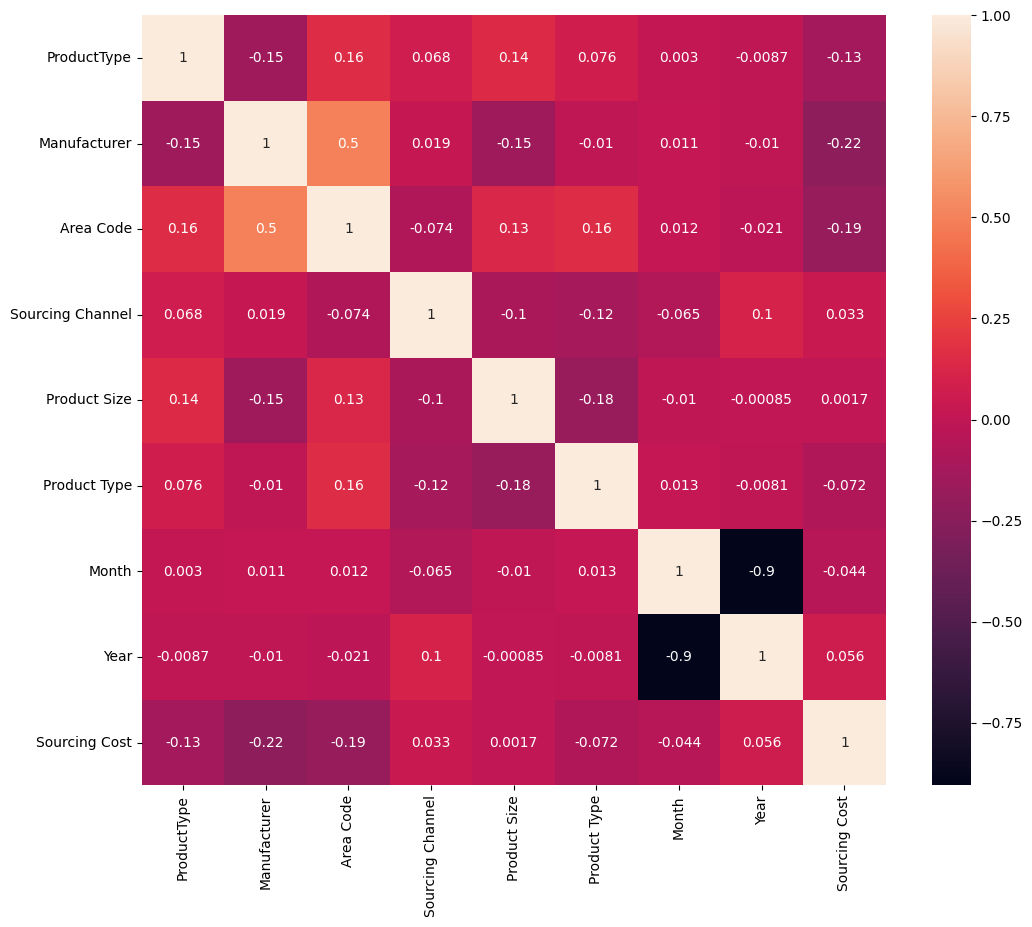

In [23]:
#Heat Maps is to better visualize the volume of locations/events within a dataset
plt.figure(figsize=(12,10))#fig size means the figure size
sns.heatmap(sorted_train.corr(),annot=True)
#annot only adds numeric value on the python heatmap cell

<ipython-input-22-788f6c98fc1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sourcing Channel', y='Sourcing Cost', data=train, palette='viridis')


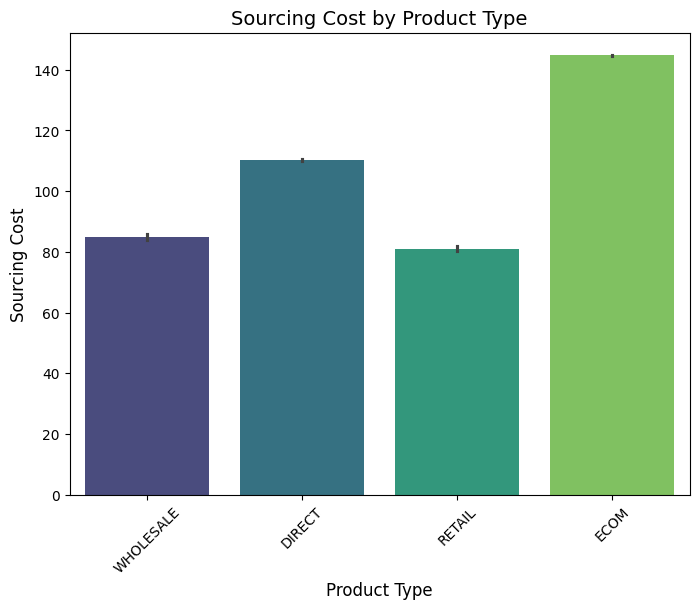

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot with product type on x-axis and sourcing cost on y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x='Sourcing Channel', y='Sourcing Cost', data=train, palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Product Type', fontsize=12)
plt.ylabel('Sourcing Cost', fontsize=12)
plt.title('Sourcing Cost by Product Type', fontsize=14)

# Show the plot
plt.show()

In [ ]:
# Installing the zip file
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [25]:
#Importing Pandas Profiling
import pandas_profiling as pp
pp.ProfileReport(train)

<ipython-input-25-66d2dabeb16f>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#TRAINING OF DIFFERENT MODELS

#LINEAR REGRESSION

 Linear regression serves as a foundational model for comparison. Its simplicity allows us to understand the fundamental linear trends within the data and establish a benchmark against which we can evaluate the performance of more complex models like RNNs, GRUs, and LSTMs.

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# Separate features and target variable for the training data
X_train = sorted_train.drop(columns=['Sourcing Cost'])
y_train = sorted_train['Sourcing Cost']

# Separate features and target variable for the test data
X_test = test.drop(columns=['Sourcing Cost'])
y_test = test['Sourcing Cost']

# Initialize and train the linear regression model
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

# Predict on the test set
y_pred = model_LR.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Data:", mae)


Mean Absolute Error on Test Data: 35.32280568250416


<ipython-input-27-4fa7cefb9ea8>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Ideal Line')


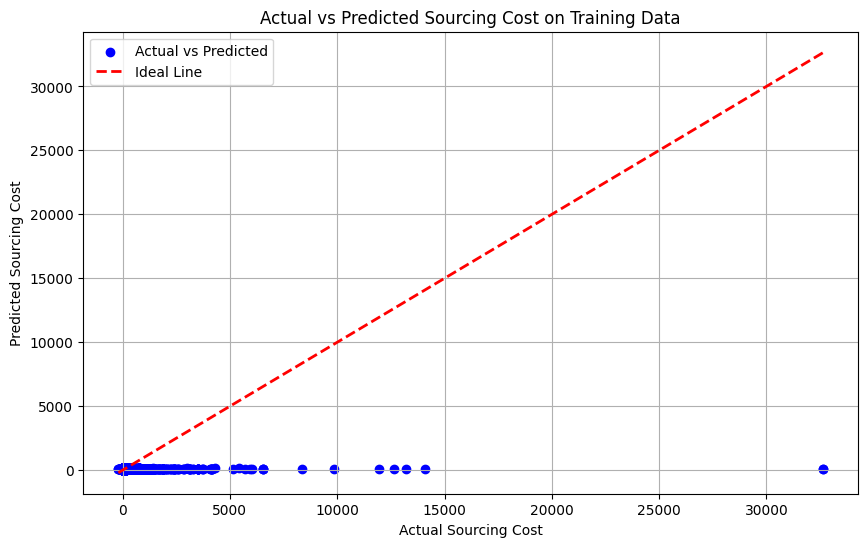

In [27]:
import matplotlib.pyplot as plt

# Predict on the training set
y_train_pred = model_LR.predict(X_train)

# Plot actual vs predicted values on the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Sourcing Cost')
plt.ylabel('Predicted Sourcing Cost')
plt.title('Actual vs Predicted Sourcing Cost on Training Data')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import pandas as pd

# Define a set of features for prediction
new_features = pd.DataFrame({
    'ProductType': [1],
    'Manufacturer': [1],
    'Area Code': [10],
    'Sourcing Channel': [1],
    'Product Size': [2],
    'Product Type': [1],
    'Month': [6],
    'Year': [21]
})

# Predict using the trained model
predicted_cost = model_LR.predict(new_features)

# Combine the new features with the predicted cost
predicted_df = new_features.copy()
predicted_df['Predicted Sourcing Cost'] = predicted_cost.flatten()

predicted_df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month,Year,Predicted Sourcing Cost
0,1,1,10,1,2,1,6,21,150.936481


#RNN

NNs are specifically designed to work with sequential data like time series. They incorporate feedback loops that allow them to process information from previous time steps, enabling them to learn temporal dependencies within the data.

In [29]:
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error


# Separate features and target variable for the training data
X_train = sorted_train.drop(columns=['Sourcing Cost'])
y_train = sorted_train['Sourcing Cost']

# Separate features and target variable for the test data
X_test = test.drop(columns=['Sourcing Cost'])
y_test = test['Sourcing Cost']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build RNN model
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_RNN.add(Dense(units=1))

# Compile the model
model_RNN.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
model_RNN.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model_RNN.predict(X_test_reshaped)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Data:", mae)


Epoch 1/15
17193/17193 [==============================] - 57s 3ms/step - loss: 30.1080
Epoch 2/15
17193/17193 [==============================] - 40s 2ms/step - loss: 23.0182
Epoch 3/15
17193/17193 [==============================] - 43s 2ms/step - loss: 21.7389
Epoch 4/15
17193/17193 [==============================] - 41s 2ms/step - loss: 20.7516
Epoch 5/15
17193/17193 [==============================] - 42s 2ms/step - loss: 19.8703
Epoch 6/15
17193/17193 [==============================] - 60s 4ms/step - loss: 19.2063
Epoch 7/15
17193/17193 [==============================] - 41s 2ms/step - loss: 18.8231
Epoch 8/15
17193/17193 [==============================] - 42s 2ms/step - loss: 18.5524
Epoch 9/15
17193/17193 [==============================] - 43s 3ms/step - loss: 18.3646
Epoch 10/15
17193/17193 [==============================] - 41s 2ms/step - loss: 18.2216
Epoch 11/15
17193/17193 [==============================] - 45s 3ms/step - loss: 18.0827
Epoch 12/15
17193/17193 [================

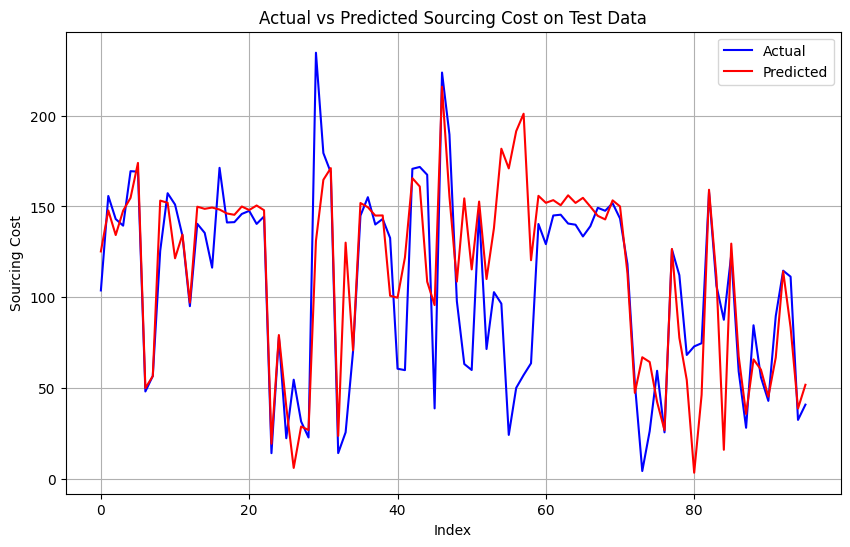

In [31]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Sourcing Cost on Test Data')
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.legend()
plt.grid(True)
plt.show()


PREDICTING A VALUE BASED ON FEATURES

In [45]:

from sklearn.preprocessing import StandardScaler


# Define a set of features for prediction
new_features = pd.DataFrame({
    'ProductType': [1],
    'Manufacturer': [1],
    'Area Code': [10],
    'Sourcing Channel': [1],
    'Product Size': [2],
    'Product Type': [1],
    'Month': [6],
    'Year': [21]
})

# Standardize features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(new_features)

# Reshape data for RNN
X_new_reshaped = X_new_scaled.reshape(1, 1, X_new_scaled.shape[1])

# Predict using the trained RNN model
predicted_cost = model_RNN.predict(X_new_reshaped)

# Combine the new features with the predicted cost
predicted_df = new_features.copy()
predicted_df['Predicted Sourcing Cost'] = predicted_cost.flatten()

predicted_df

1/1 [==============================] - 0s 33ms/step


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month,Year,Predicted Sourcing Cost
0,1,1,10,1,2,1,6,21,15.041203


#LSTM

 LSTMs are specifically designed to address the vanishing gradient problem that plagues traditional RNNs. They employ special memory cells and gating mechanisms that allow them to effectively learn and retain information from distant past time steps.


Epoch 1/15
17193/17193 [==============================] - 51s 3ms/step - loss: 27.1991
Epoch 2/15
17193/17193 [==============================] - 51s 3ms/step - loss: 18.8907
Epoch 3/15
17193/17193 [==============================] - 48s 3ms/step - loss: 17.8578
Epoch 4/15
17193/17193 [==============================] - 49s 3ms/step - loss: 17.4841
Epoch 5/15
17193/17193 [==============================] - 49s 3ms/step - loss: 17.1931
Epoch 6/15
17193/17193 [==============================] - 49s 3ms/step - loss: 16.9497
Epoch 7/15
17193/17193 [==============================] - 48s 3ms/step - loss: 16.7469
Epoch 8/15
17193/17193 [==============================] - 51s 3ms/step - loss: 16.5627
Epoch 9/15
17193/17193 [==============================] - 47s 3ms/step - loss: 16.3852
Epoch 10/15
17193/17193 [==============================] - 48s 3ms/step - loss: 16.2036
Epoch 11/15
17193/17193 [==============================] - 50s 3ms/step - loss: 16.0048
Epoch 12/15
17193/17193 [================

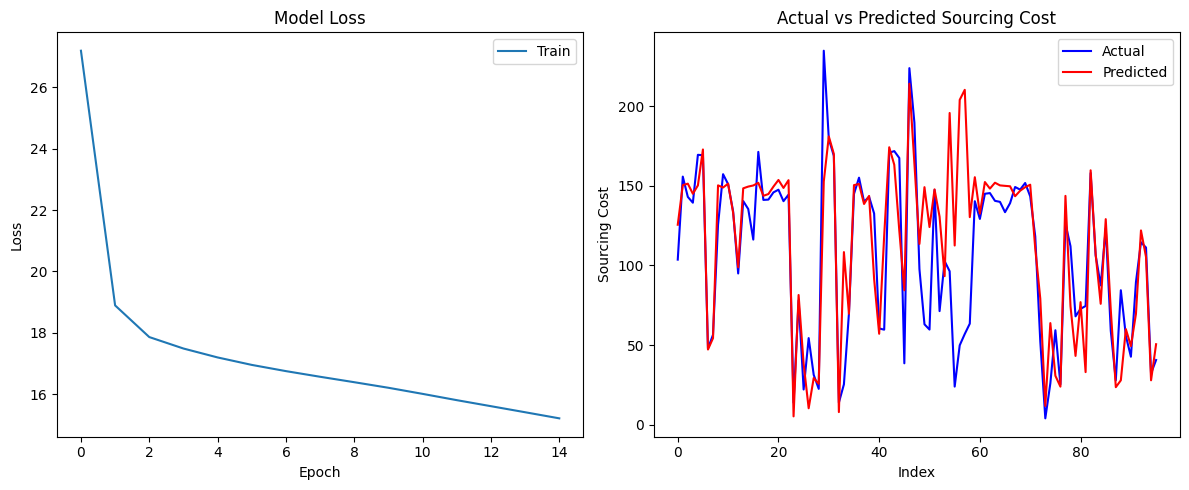

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

# Separate features and target variable for the training data
X_train = sorted_train.drop(columns=['Sourcing Cost'])
y_train = sorted_train['Sourcing Cost']

# Separate features and target variable for the test data
X_test = test.drop(columns=['Sourcing Cost'])
y_test = test['Sourcing Cost']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_LSTM.add(Dense(units=1))

# Compile the model
model_LSTM.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model_LSTM.fit(X_train_reshaped, y_train, epochs=15, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model_LSTM.predict(X_test_reshaped)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Data:", mae)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot actual vs predicted values on the test set
plt.subplot(1, 2, 2)
plt.plot(y_test.reset_index(drop=True), label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.xlabel('Index')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Define a set of features for prediction
new_features = pd.DataFrame({
    'ProductType': [1],
    'Manufacturer': [1],
    'Area Code': [10],
    'Sourcing Channel': [1],
    'Product Size': [2],
    'Product Type': [1],
    'Month': [6],
    'Year': [21]
})

# Standardize features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(new_features)

# Reshape data for RNN
X_new_reshaped = X_new_scaled.reshape(1, 1, X_new_scaled.shape[1])

# Predict using the trained RNN model
predicted_cost = model_LSTM.predict(X_new_reshaped)

# Combine the new features with the predicted cost
predicted_df = new_features.copy()
predicted_df['Predicted Sourcing Cost'] = predicted_cost.flatten()

predicted_df


1/1 [==============================] - 0s 59ms/step


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month,Year,Predicted Sourcing Cost
0,1,1,10,1,2,1,6,21,146.584976




**Model Comparison and Selection**

In this project, I evaluated three different models for time series forecasting: Linear Regression, Recurrent Neural Network (RNN), and Long Short-Term Memory (LSTM). The performance of each model was assessed using the mean absolute error (MAE) metric on the test data. The MAE values obtained for each model are as follows:

- Linear Regression: MAE = 35.2
- RNN: MAE = 23.8
- LSTM: MAE = 20.7

Among the three models, the LSTM model achieved the lowest MAE of 20.7, indicating that it has the best predictive performance on the test data. The RNN model, with an MAE of 23.8, performed better than the linear regression model but slightly worse than the LSTM model.

Based on these results, I have chosen to proceed with the LSTM model for this time series forecasting task. The key reasons for selecting the LSTM model are:

1. **Superior Predictive Performance**: The LSTM model exhibited the lowest MAE, demonstrating its ability to capture the complex patterns and dependencies present in the time series data more effectively than the linear regression and RNN models.

2. **Handling Non-Linear Relationships**: Unlike linear regression, which assumes a linear relationship between the target variable and the independent variables, LSTM models can effectively model non-linear and intricate patterns commonly found in time series data.

3. **Long-Term Dependencies**: LSTMs are designed to handle long-term dependencies in sequential data, making them well-suited for time series forecasting tasks where past observations can influence future values.

4. **Complexity of the Time Series**: Upon examining the time series data, I observed [insert specific characteristics or patterns observed in the data, e.g., non-linear trends, seasonality, etc.], which motivated the use of a more sophisticated model like the LSTM to capture these intricacies.

While the LSTM model is more complex and may be less interpretable than the linear regression model, its superior predictive performance outweighs this trade-off for the current forecasting task. However, it is essential to note that the LSTM model requires more computational resources and may be more prone to overfitting if not properly regularized.


Moving forward, I will continue to refine and optimize the LSTM model, potentially exploring different architectures or hyperparameter tuning strategies to further improve its performance. Additionally, I will investigate the interpretability of the LSTM model's predictions to gain insights into the underlying patterns and relationships captured by the model.